In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [67]:
data1=np.array([1,2,3,4,5,6])
data1

array([1, 2, 3, 4, 5, 6])

In [68]:
# with replacement로 위 데이터1에서 데이터 뽑기 = random smapling with replacement

np.random.seed(0)
np.random.choice(data1,size=6,replace=True)

array([5, 6, 1, 4, 4, 4])

In [69]:
np.random.choice(data1,size=6,replace=True)

array([2, 4, 6, 3, 5, 1])

In [70]:
np.random.choice(data1,size=6,replace=True)

array([1, 5, 3, 2, 1, 2])

In [71]:
np.random.choice(data1,size=6,replace=True)

array([6, 2, 6, 1, 2, 5])

In [72]:
# 이렇게 매번 새로운 데이터 set 이 나옴. 이렇게 나온 data set 이용해서 = boostraping 해서 tree 만들어서, 그 tree의 prediction에서부터 fianl prediction 함.


In [73]:
np.random.choice(data1,size=20,replace=True)

array([4, 1, 4, 6, 1, 3, 4, 1, 2, 4, 6, 4, 4, 1, 2, 2, 2, 1, 3, 5])

In [74]:
# 예제

data2="c:/temp/iris.csv"
iris=pd.read_csv(data2)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [75]:
np.random.seed(0)
iris_100=iris.iloc[np.random.randint(150,size=100)] 
# with replacement으로 뽑은거
#iloc: 0부터 149까지 숫자가 있는데 그 중에 무작위로 100개 숫자 선택해서 뽑아라
# 응? 필기추가
iris_100

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
47,4.6,3.2,1.4,0.2,setosa
117,7.7,3.8,6.7,2.2,virginica
67,5.8,2.7,4.1,1.0,versicolor
103,6.3,2.9,5.6,1.8,virginica
9,4.9,3.1,1.5,0.1,setosa
...,...,...,...,...,...
138,6.0,3.0,4.8,1.8,virginica
114,5.8,2.8,5.1,2.4,virginica
43,5.0,3.5,1.6,0.6,setosa
127,6.1,3.0,4.9,1.8,virginica


In [76]:
# Bagging
# iris(150 obs) 먼저 train - test set으로 구분하자.
# 전체 데이터의 70%을 train으로 두고, 나머지 30%을 test set으로 둔다.
# train set (105개 = 150*0.7)
# bagging을 105개 무작위로 다시 105개를 뽑는다. BS1-> tree1
# BS2: 원 데이터 105개를 이용해서 무작위로 105개를 뽑는다. 그리고 다시 tree를 만든다. tree2

X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=iris['Species']

In [77]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [78]:
# train set과 test set으로 구분한다.
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)
X_train # 105개의 값이 나올 것

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [79]:
X_test # 45개 값이 나옴

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [80]:
# train set을 이용해서 Bagging을 한다.
# Bagging : RandomForestClassifier 안에 bagging 쓸 수있음
# 지금 y 변수가 3개로 범주형이니까 RandomForestClassifier 사용
# Bagging: 105개의 train set에서 105개 전체를 이용해서...

bag1=RandomForestClassifier(n_estimators=10,max_features='n_features',random_state=0,max_depth=2)
# n_estimators=10 : 나무 10개 만들어 = boostraping w/ replacement로 10번해
# max_samples=0.7 : 전체 데이터 다 이용하는게 아니라 105개 중에 70퍼센트만 이용해서 boostraping 하는 것
# max_features='n_features': features는 x변수를 말함. 지금 데이터의 x 변수 4개 다 써서 만들어

In [81]:
bag1

RandomForestClassifier(max_depth=2, max_features='n_features', n_estimators=10,
                       random_state=0)

In [82]:
result1=bag1.fit(X_train,y_train)
result1

ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

In [85]:
bag1=RandomForestClassifier(n_estimators=10,random_state=0,max_depth=2)
result1=bag1.fit(X_train,y_train)
result1 # result1 엔 나무가 10개 저장되어 있는것

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=0)

In [86]:
pred1=result1.predict(X_test)
pred1

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [87]:
# ^^ 나무 10개에다가 X_test 다 넣어본 결과

In [88]:
# 예측 성과 보기
confusion_matrix(y_test,pred1)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

In [89]:
# 45개 중에 2개 빼고 다 맞춤
43/45

0.9555555555555556

In [90]:
# none 으로 바꾸면됨
# 나무 100개도 해봄 : 좀 더 좋아짐
# 나무 500개도 해봄
# 근데 100개 이상 : 크게 성과가 좋아지는 건 아님

bag1=RandomForestClassifier(n_estimators=10,max_features='none',random_state=0,max_depth=2)

# 2. Random Forest

## bagging 과 random forest 차이

1) train set 중 2/3 만 사용 - > rf / train set 다 사용 -> bg
2) x 변수중 몇 가지만 사용해서 -> rf / 

to uncorrelated 된 나무 만들기 위함임. -> overfitting 의 가능성 줄음.  

장점
rf: 대규모 데이터에서 적절.  

단점
나무의 구조가 주어지면 결과 이해하기 쉬운데, bg이나 rf는 많은 나무를 사용하니까 나무를 그릴 수 없음. 눈에 들어오는 결과가 없다. 
ex. 맨 위 변수가 중요한 변수인데 그런거 알 수 가 없다.

In [91]:
# BG vs RF
# 1) rf: train set의 일부분을 사ㅛㅇㅇ해서 bG을 ㅏㅎㄴ다.
# 2) rf: tree 만들때 x변수를 split 시점에서 모두 사용하는 대신 sqrt(p) 개 x 변수만 사용한다.
# max_features='auto',max_samples=0.66
rf1=RandomForestClassifier(n_estimators=10, max_features='auto',max_samples=0.66, random_state=0, max_depth=2)

In [92]:
result2=rf1.fit(X_train,y_train)
result2

RandomForestClassifier(max_depth=2, max_samples=0.66, n_estimators=10,
                       random_state=0)

In [93]:
pred2=result2.predict(X_test)
pred2

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [94]:
confusion_matrix(y_test,pred2)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

In [95]:
# 딱 하나 틀림! 아까보다 예측성과 좋음
# 오잉 교수님일아 다름. 왜지? 난 두개 트렸는데...

In [96]:
# y: 연속형인 경우 RandomForestRegressor

file3="c:/temp/Boston.csv"
data3=pd.read_csv(file3)
data3

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [97]:
X=data3.drop('medv',axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [98]:
y=data3['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)
506*0.7

354.2

In [100]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358,14.8,368.24,4.97
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80


In [101]:
505-354 # test set size

151

In [102]:
# bag 결과
bag2=RandomForestRegressor(n_estimators=100,max_features=None,random_state=0,max_depth=3)
result3=bag2.fit(X_train,y_train)

In [103]:
pred3=result3.predict(X_test) # 위에서 max_Features=none이랑 auto 차이 ㅍㅊ 하기
pred3

array([23.88975469, 28.17639323, 21.27493   , 11.96101789, 21.12242157,
       22.84831025, 21.11407711, 22.78273757, 21.40948087, 21.11407711,
       11.76071032, 13.8224608 , 14.26714677, 11.85239512, 46.47978502,
       32.06438648, 21.23522309, 33.65060522, 25.45730599, 22.87700859,
       23.82948153, 21.23037362, 21.06952073, 23.88975469, 21.29395045,
       20.80304458, 21.03345008, 15.56617588, 44.15604435, 17.05959916,
       14.34376608, 17.74545518, 21.4724336 , 21.25457613, 22.84824885,
       17.63915163, 11.91251098, 28.46922082, 14.58546744, 15.7376808 ,
       22.9740947 , 21.19274022, 23.07982991, 15.42448704, 23.57651631,
       22.90852201, 17.88608446, 15.58506086, 14.31729825, 25.18418114,
       16.16561535, 16.97757703, 21.21309409, 40.09428719, 16.22840341,
       17.85484622, 21.19274022, 21.12242157, 24.22748383, 17.02583959,
       23.60855013, 21.09896136, 31.18572938, 29.26504227, 17.88859171,
       27.1202953 , 15.74683604, 17.08767549, 17.64684667, 21.20

In [104]:
# 예측성과 평과 위해서는 MSE

mean_squared_error(y_test,pred3)

17.857767501639618

In [105]:
# bagging 해서 얻은 100개 나무의 MSE . 작을수록 좋음.
# 과연 rf에서는?

In [110]:
# RF

rf4=RandomForestRegressor(n_estimators=100, max_features='auto',max_samples=0.66, random_state=0, max_depth=3)
result4=rf4.fit(X_train,y_train)
pred4=result4.predict(X_test)
pred4

array([23.50382171, 25.54487929, 21.19510425, 11.92906734, 21.2475276 ,
       22.47792474, 21.55819085, 22.4400132 , 21.76214854, 21.28333216,
       11.84840852, 14.0493638 , 14.70837253, 11.69164818, 46.97528517,
       31.72443059, 21.50713015, 33.62170673, 25.08312709, 22.47792474,
       23.42115463, 21.03914743, 21.09256192, 23.42115463, 21.31696376,
       20.9624096 , 21.14153688, 15.12847893, 43.20880674, 17.16397375,
       14.76129945, 18.04724034, 21.50427806, 21.21369445, 22.47837875,
       17.46362789, 11.7589719 , 25.55823558, 14.80508852, 15.70743661,
       22.47792474, 21.1647195 , 22.55651344, 15.62137696, 23.38920077,
       22.47837875, 17.98183211, 15.12847893, 13.95519349, 25.65661718,
       15.92567681, 17.27375919, 21.28061812, 41.37936704, 16.35791075,
       17.90837898, 21.21369445, 21.21369445, 23.41801728, 17.29262687,
       23.08532127, 21.21369445, 30.93179537, 29.72260575, 18.1099522 ,
       26.81091205, 16.02539182, 17.06194002, 18.46544091, 21.28

In [111]:
mean_squared_error(y_test,pred4)

19.639974504576372

In [112]:
# 몇개 x변수이용?
np.sqrt(13)

3.605551275463989

In [113]:
# 4개

In [114]:
# rf 사용시 mse가 더 큼. 더 예측 별로임

In [115]:
# rf에서 어떤 변수가 상대적으로 중요하고 덜 중요한지 어떻게 알 수 잇느냐? 나무가 100개나 있는데

# 변수의 중요성 측정하는 방법 Variable Importance Index : VIP

inp=result4.feature_importances_
inp #array type으로 저장되어있다.

array([2.13681757e-02, 4.65869412e-04, 2.89659108e-03, 8.14505090e-04,
       1.32182661e-02, 4.93489561e-01, 4.21119016e-03, 3.02357322e-02,
       2.12648443e-03, 4.74239267e-03, 9.71116968e-03, 3.51993027e-03,
       4.13200132e-01])

In [117]:
# x변수 13개에 대한 vip 값 ^^
# 2.13681757e-02 = 0.021 응? ㅍㅊ
# 10^-1
# 0.414=4.13200132e-01

# 저 숫자들이 뭔지는 모르겠지만, 주택가격 예측에서 lstat가 crime 보다 훨씬 중요하구나.. 0.021<0.413

# 숫자들의 의미 ... 아이디어: 변수를 빼고 나머지 변수로 rf 해봄. 중요한 변수 뺐다면 예측 성과 안 좋을 것.. 들어갔을 때와 뺐을 때 예측 성과가 얼마나 달라지는 가 
# 숫자의미: 그변수가 들어갔을 때, 없을 때보다 얼마나 더 개선되는가!



In [118]:
# bar graph로 그려서 어떤 변수가 제일 중요한지 봐보자

# step1 : array 구조를 data frame 으로 변환한다.
inp1=pd.DataFrame({'importance':inp},index=X.columns)
inp1

,importance
crim,0.021368
zn,0.000466
indus,0.002897
chas,0.000815
nox,0.013218
rm,0.493490
age,0.004211
dis,0.030236
rad,0.002126
tax,0.004742


In [119]:
# 시험 문제: 가장 중요한 변수 - 가장 높은 숫자, 가장 안중요한 변수 : 가장 작은 숫자

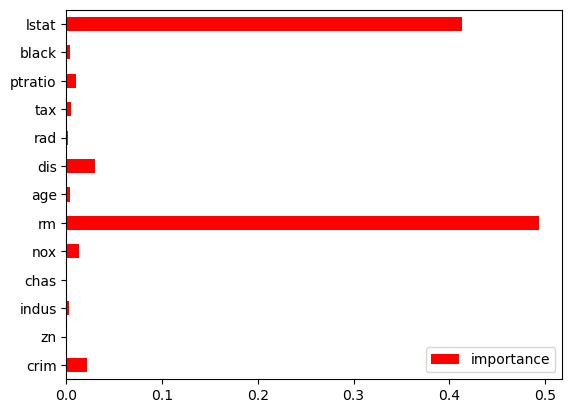

In [122]:
# 그래프로 보자
inp1.plot(kind='barh',color='red')
plt.show()

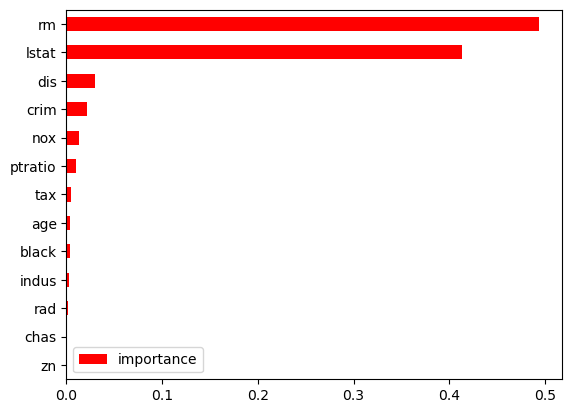

In [128]:
# 순서대로 예쁘게 그리기

inp1.sort_values('importance',ascending=True, inplace=True)
inp1.plot(kind='barh',color='red')
plt.show()

In [129]:
inp1.sort_values('importance',ascending=True, inplace=True)
inp1

,importance
zn,0.000466
chas,0.000815
rad,0.002126
indus,0.002897
black,0.003520
age,0.004211
tax,0.004742
ptratio,0.009711
nox,0.013218
crim,0.021368


In [130]:
inp1.sort_values('importance',ascending=False, inplace=True)
inp1

,importance
rm,0.493490
lstat,0.413200
dis,0.030236
crim,0.021368
nox,0.013218
ptratio,0.009711
tax,0.004742
age,0.004211
black,0.003520
indus,0.002897


In [131]:
# 그래프는 맨 아래 값부터 그림... 별로 중요하진 않음.

In [ ]:
# 끝끝끝